# Assignment 7: Linear regression - model estimation
This assignment introduces you to the estimation of parameters through the minimization of a loss function. We are doing this in the context of linear regression. You will learn to plot the relationship between 2 variables, write a function that makes the model prediction, write a function that calculates the loss function, and how to estimate the parameters of the model. While there are many libraries that implement simple regression, you are learning here a universal way that is applicable to ANY mathematical model. 

The data set possum.csv is a sample of 46 possums that were caught in Victoria (NZ) in a field study. 
- age:  Age (years).
- headL:  Head length, in mm.
- skullW:  Skull width, in mm.
- totalL:  Total length, in cm.
- tailL:  Tail length, in cm.


## Preliminaries

In [91]:
import matplotlib
import matplotlib.pyplot as plt 
import scipy.optimize as so
import pandas as pd 
import numpy as np

## Task 1: Scatterplots
### Question 1.1 (8pts)
Make a scatter plot between age and head size. Make sure to label your x-axis and y-axis. Written answer: is there a relationship between the two variables? How would you describe it qualitatively (is the relationship positive or negative, is it linear, etc)? 

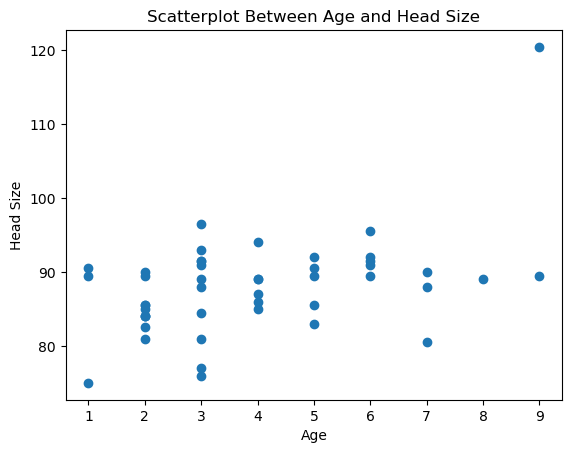

The pearson correlation coefficient is 0.4524646734400021


In [92]:
possum = pd.read_csv("possum.csv")
age = possum["age"]
head_size = possum["totalL"]

plt.scatter(age, head_size)
plt.xlabel("Age")
plt.ylabel("Head Size")
plt.title("Scatterplot Between Age and Head Size")
plt.show()

correlation = np.corrcoef(age, head_size)[0, 1]
print("The pearson correlation coefficient is", correlation)

I feel that there is no clear relationship between age and head size since the head size for each age of an individual seems to vary.

Before identifying the relationship of both variables qualitatively, I first calculated the pearson correlation coeficient which was 0.45. After discovering the correlation, I came to the conclusion that I would describe the relationship qualitatively as a weak positive relationship between both variables, age and head size as it appears to be moving in an upward trend, however, there appears to be head sizes that vary for any age.

### Question 1.2 (8pts)
Make a scatter plot between head size and skull width. Written answer: is there a relationship between the two variables? How would you describe it qualitatively? Are there unusual data points (i.e. outliers) in the data set? What may be a possible explanation?    

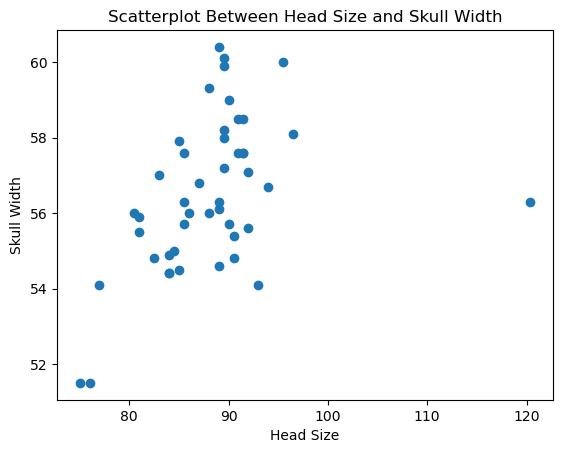

The pearson correlation coefficient is 0.4231301772329532


In [93]:
head_size = possum["totalL"]
skullW = possum["skullW"]

plt.scatter(head_size, skullW)
plt.xlabel("Head Size")
plt.ylabel("Skull Width")
plt.title("Scatterplot Between Head Size and Skull Width")
plt.show()

correlation = np.corrcoef(head_size, skullW)[0, 1]
print("The pearson correlation coefficient is", correlation)

The relationship between both variables, head size and skull width is as the head size increases, the width of the skull increases as well. Therefore, based on the scatterplot, quantitatively, there is a positive relationship between head size and skull width.

Bssed on the scatterplot, there appears to be a few outliers in the graph that are 2 individuals with a skull width below 52 mm and an individual with a head length of 120 cm. The possible explanation for these outliers in this instance could potentially be due to inaccuracies in measurements of the total head size and skull width.

## Task 2 Fit a linear regression line "by hand"
### Question 2.1 (10 pts)
Write a function simpleRegPredict(b,x) that takes as an input b a list of two parameter [intercept,slope] and as x values of an x-variable. The function should then return the predicted values for y following the linear model (see lecture). Call the function using b=[83,2] as parameters and to predict the value for x=2. 


In [94]:
def simpleRegPredict(b, x):
    # b = [intercept, slope] list that has consists of the y-intercept(b) 
    # and slope(m). x = x-values
    
    intercept = b[0]
    slope = b[1]
    ypred = slope*x + intercept
    
    return ypred

function = simpleRegPredict([83,2], 2)
print("The predicted value for y using using b=[83,2] and x = 2 as parameters is", function)
    

The predicted value for y using using b=[83,2] and x = 2 as parameters is 87


### Question 2.2 (10pts)
Write a function plotPrediction(b,x,y,fcn=simpleRegPredict) that makes a scatter plot of the x vs. the y-variable and then plots a regression line into the plot (see lecture / lab for hints). Call the function for x being the age, y=headL, and b=[83,2].

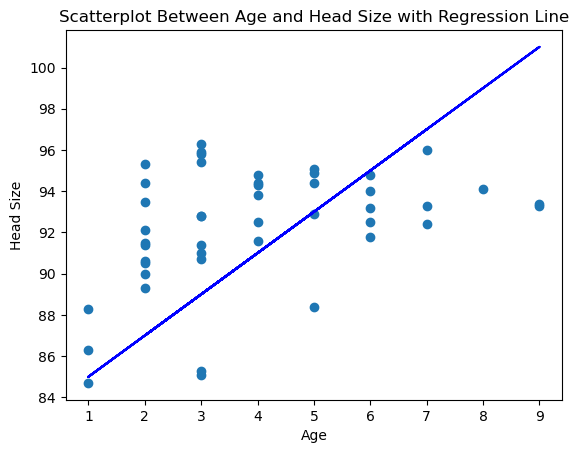

In [95]:
# b = [intercept, slope]

def plotPrediction(b, x, y, fcn = simpleRegPredict):
    plt.scatter(x, y)
    plt.xlabel("Age")
    plt.ylabel("Head Size")
    
    
    plt.plot(x, fcn(b, x), color = 'blue')
    
    plt.show()
    
plt.title("Scatterplot Between Age and Head Size with Regression Line")

headL = possum["headL"]

plotPrediction(b = [83, 2], x = age, y = headL)


### Question 2.3 (10pts)
Write a loss function simpleRegLossRSS(b,x,y) that takes as the inputs the parameters (b), the explanatory (x) and the response variable (y) and then calculates and returns the residual sum-of-squares of the linear fit. It also should return the derivate of the Loss function in respect to the two parameters (see lecture / lab). The function should use your function simpleRegPred. Call the function with b=[83,2] as parameters, x=age and y= headL. What is the residual sum of squares? What is the derivative? In order to minimize the Loss, would you need to increase or decrease the slope/intercept? 

In [96]:
# b = [intercept, slope]

def simpleRegLossRSS(b, x, y):
    ypred = simpleRegPredict(b, x)
    residual_sum_of_squares = np.sum((y - ypred) ** 2)
    derivative_loss_fcn_yint = -2 * sum(y - ypred)
    derivative_loss_fcn_slope = -2 * sum((y - ypred) * x)
    
    return residual_sum_of_squares, [derivative_loss_fcn_yint, derivative_loss_fcn_slope]

simpleRegLoss(b = [83,2], x = age, y = headL)

(818.39, [-128.6, 54.19999999999993])

In order to minimize the Loss in this instance, you would need to increase intercept since it is a negative number and decrease the slope since it is a positive number.

### Question 2.4 (10pts)
First try to reduce the slope value and try parameter values b=[83,0.6]. Then increase the intercept and try b=[89,0.6]. For each value make the prediction plot and report the residual-sum-of squares using your functions from question 2 and 3. Which fit provides the lowest loss (rss)? How do the derivatives change for each value? And according to the derivative, which direction should you change the parameters? Play around with other parameter settings. Can you find one that gives you a loss below rss=350? 

(2537.87, [-638.1999999999999, -2510.6000000000004])
residual-sum-of squares is 2537.87


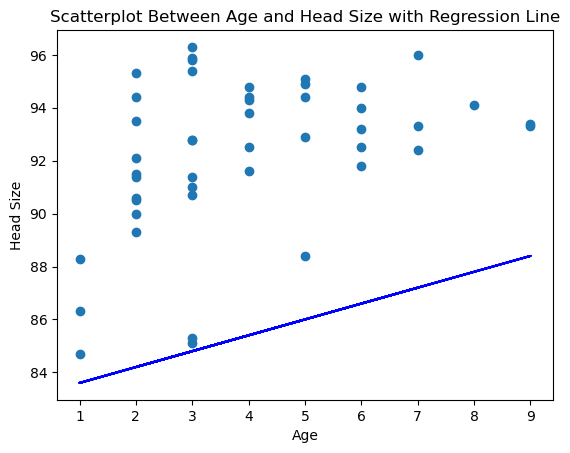

In [97]:
# b = [intercept, slope]
residual_sum_of_squares, [derivative_loss_fcn_yint, derivative_loss_fcn_slope] = simpleRegLoss(b = [83, 0.6], x = age, y = headL)

print(simpleRegLoss(b = [83, 0.6], x = age, y = headL))
print("residual-sum-of squares is", residual_sum_of_squares)

plt.title("Scatterplot Between Age and Head Size with Regression Line")

plotPrediction(b = [83, 0.6], x = age, y = headL)

(364.66999999999985, [-86.19999999999999, -326.6])
residual-sum-of squares is 364.66999999999985


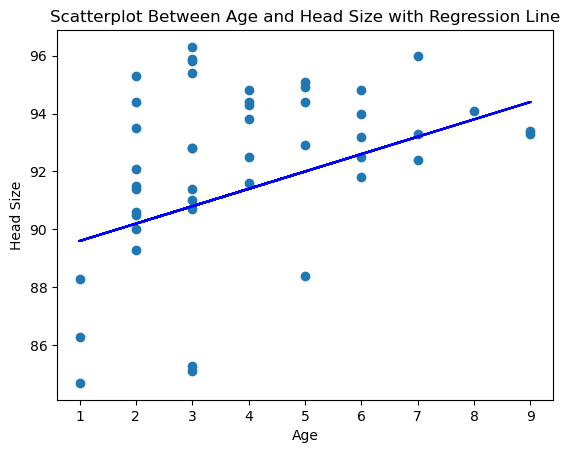

In [98]:
# b = [intercept, slope]
residual_sum_of_squares, [derivative_loss_fcn_yint, derivative_loss_fcn_slope] = simpleRegLoss(b = [89, 0.6], x = age, y = headL)

print(simpleRegLoss(b = [89, 0.6], x = age, y = headL))
print("residual-sum-of squares is", residual_sum_of_squares)

plt.title("Scatterplot Between Age and Head Size with Regression Line")

plotPrediction(b = [89, 0.6], x = age, y = headL)

Following the original values (intercept = 83, slope = 2), when we decrease the slope, the rss increases, and when we increase the y-intercept, the rss decreases. Since decreasing the slope provides a higher rss, we can conclude that the first scatterplot would have a fit that provides the lowest loss (rss). In both scatterplots, it shows that we need to increase both the intercept and slope to minimize the Loss. However, the intercept should be focused on more since it is the closest to 0 compared to the slope.

(350.6300000000003, [-68.0, -235.0000000000002])
residual-sum-of squares is 364.66999999999985


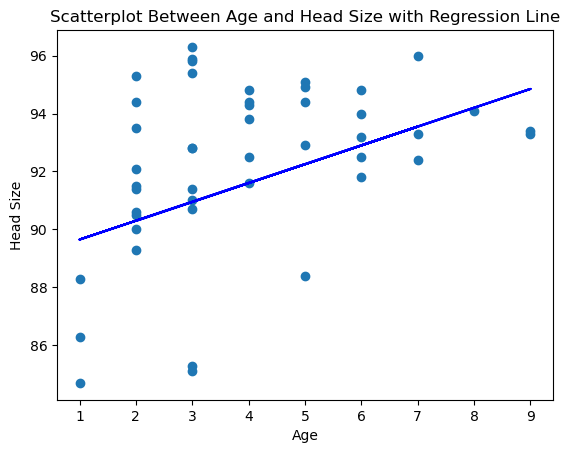

In [99]:
# b = [intercept, slope]
residual_sum_of_squares, [derivative_loss_fcn_yint, derivative_loss_fcn_slope] = simpleRegLoss(b = [89, 0.6], x = age, y = headL)

print(simpleRegLoss(b = [89, 0.65], x = age, y = headL))
print("residual-sum-of squares is", residual_sum_of_squares)

plt.title("Scatterplot Between Age and Head Size with Regression Line")

plotPrediction(b = [89, 0.65], x = age, y = headL)

## Task 3: Fit the linear model using scipy.optimize.minimize
### Question 3.1 (10pts)
Use scipy.optimize.minimize to minimize the function value of simpleRegLossRSS(b,x,y) from task 2, question 2. As starting values simply give b0=[0,0]
Show the result structure. Written answer: What is the estimated parameter value for intercept and slope and what is the best achieved rss? 

In [100]:
x = age
y = headL

minimize = so.minimize(simpleRegLoss, [0, 0], args=(x, y), jac=True)

minimize

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 324.02064580559266
        x: [ 9.008e+01  5.631e-01]
      nit: 7
      jac: [-3.894e-12 -3.004e-11]
 hess_inv: [[ 5.082e-02 -1.010e-02]
            [-1.010e-02  2.552e-03]]
     nfev: 9
     njev: 9

The esimtated parameter value for intercept and slope are 90.1 and 0.56. The best achieved rss is 324.02. 

### Question 3.2 (8pts)
Use your function plotPrediction (from above) to plot this best linear fit between age and head length. 

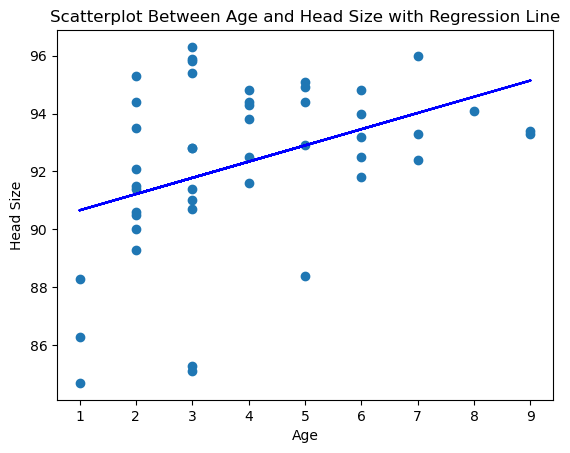

In [101]:
plt.title("Scatterplot Between Age and Head Size with Regression Line")
plotPrediction(b = [90.1, 0.56], x = age, y = headL)

### Question 3.3 (8pts)
Calculate the **total** sum-of-squares by subtracting the mean from all the y-values, squaring the result and finally summing them up. What is the total sum of squares for headL? 

In [102]:
x = age
y = headL

total_sum_of_squares = sum((y - np.mean(y)) ** 2)
print(total_sum_of_squares)

386.1445652173914


### Question 3.4 (10pts)
Write a function simpleRegFit(x,y) that (a) estimates the parameters as done in Question 3.1, (b) plots the predictions as done in 3.2 and (c) calculates (and returns) R2 of the fit.  Call the function with x=age and y=headL.  Written answer: What is the R2 of the fit? How can you interpret it? 

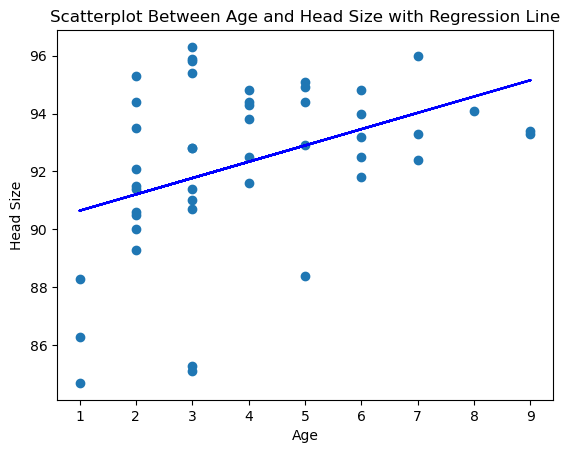

R2= (0.16088254246650902, array([90.08288948,  0.56311585]))


In [103]:
def simpleRegFit(x, y, lossfcn=simpleRegLossRSS):
    
    b0=[np.mean(y),0]
    RES = so.minimize(lossfcn,b0,args=(x,y),jac=True)
    b=RES.x # Results
    plotPrediction(b,x,y,simpleRegPredict)
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,grad = simpleRegLossRSS(b,x,y)
    R2 = 1-RSS/TSS 
    return (R2,b)
    
    return r2

plt.title("Scatterplot Between Age and Head Size with Regression Line")

R2 = simpleRegFit(x = age, y = headL)
print("R2=", R2)


The interpretation that can be made for the r2 value is that the model accounts for 16.1% of the Head Length.

### Question 3.5 (8pts)
Fit a linear model between age (x) and tail length (y). How good is the fit? Are there outliers? How much would the slope of the line change if you excluded the outlier?  

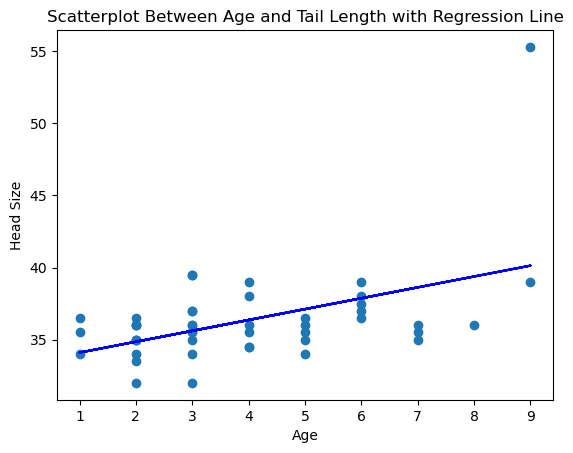

R2= (0.22286587947604053, array([33.35046605,  0.75372836]))


In [104]:
plt.title("Scatterplot Between Age and Tail Length with Regression Line")
R2 = simpleRegFit(x = age, y = possum["tailL"])
print("R2=", R2)

The fit seems to have an issue, as there is a distinct outlier as shown in the scatterplot, where a particular possum has a tail length of 55 cm, which is 15cm larger than the average tail length amongst the other possums. If this outlier was excluded from the graph, the slope of the line would be much lower and fit more with the model.